## Mall Dataset Analysis By Using K-Means Clustering and Python.

### Part 1 - Data Preprocessing
### Importing Libraries and Datasets

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
dataset1 = dataset      # Keeping this original dataset for the final submission.
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Below comand shows there are total 200 rows and 5 columns in the input dataset.

In [3]:
# shape Of the Data Set
print(dataset.shape)

(200, 5)


### Dropping the Customer ID Column since there is no impact of this column on the final Prediction.

In [4]:
#drop Customer Id column
dataset = dataset.drop('CustomerID',axis=1)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Summarize the Dataset

In [5]:
# more info on the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB
None


In [6]:
# descriptions/Statistical Summary
print(dataset.describe())

              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


### Part 2 - Data Visualization

#### We'll achieve this by using two type of plots.
#### 1. Univariate plots will help us to understand each attribute.
#### 2. Multivariate plots will help us to understand the relationships between attributes.

#### Univariate plots -  Below are the box and whisker plots which will tell us that there are clear distributions of the input attributes

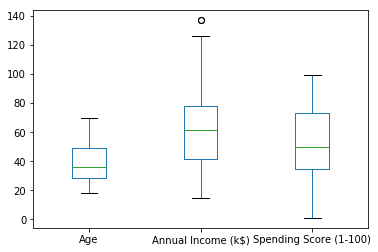

In [7]:
# box and whisker plots
dataset.plot(kind='box', sharex=False, sharey=False)

#### We'll create a histogram of each input variable to get an idea of the distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000126ACD28BE0>,
      dtype=object)

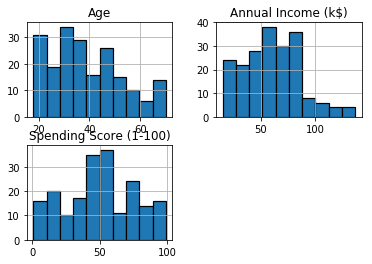

In [8]:
# histograms
dataset.hist(edgecolor='black', linewidth=1.2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000126AD1EA1D0>,
      dtype=object)

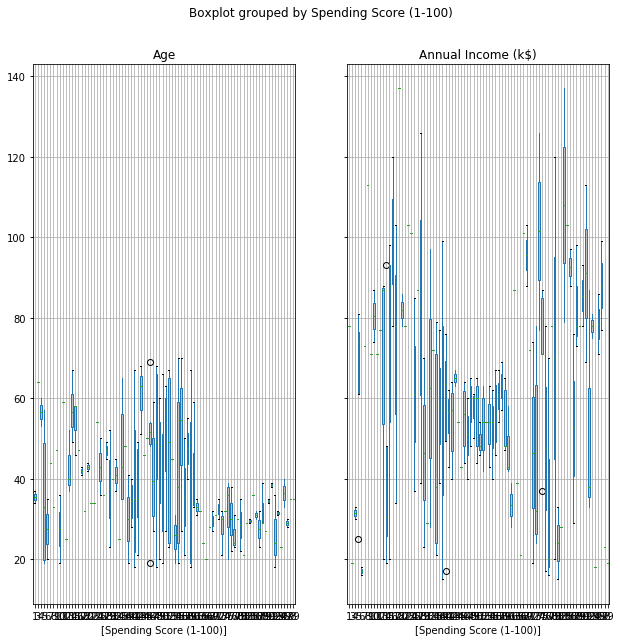

In [9]:
# boxplot on each feature split out by spending scores.
dataset.boxplot(by="Spending Score (1-100)",figsize=(10,10))

### Multivariate Plots

#### We'll look at the interactions between the variables.First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

#### Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship. I've done this here by using both Pandas library.


C:\Users\Prasanna Mohanty\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


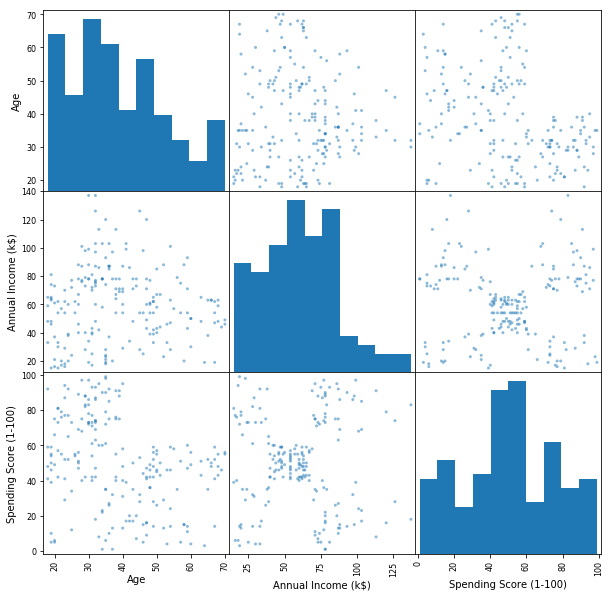

In [10]:
from pandas.tools.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

#### Here, I tried to draw the two dimensional graph between Age VS Spending Score and Annual Income VS Spending Score. We can clearly see that these data are not linearly distributed. In the next section we'll group these data into different groups or clusters.

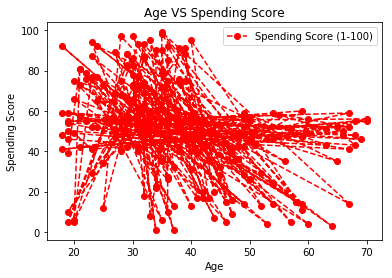

In [11]:
plt.plot(dataset["Age"], dataset["Spending Score (1-100)"], 'ro--')
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

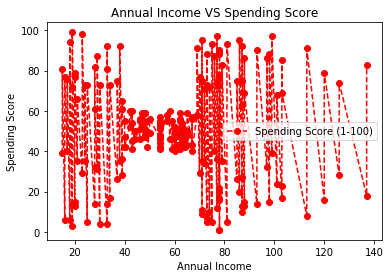

In [12]:
plt.plot(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"], 'ro--')
plt.title('Annual Income VS Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Part 3 - Prediction Using K-Means Clustering (or centroid based clustering) Algorithm. 

#### Here, we'll try to find out the optimal number of clusters by using elbow method. Below graph shows clearly that there are total 5 clusters (groups). That means the input file data can be segregated into 5 different groups or clusters.

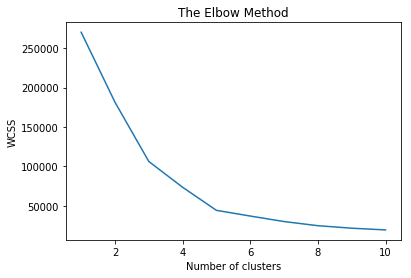

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Here we're fitting the K-Means algorithm to the dataset. 5 clusters are allocated in this step; this was determined in the above step.

In [14]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

#### Now all the customers are categorised into different groups or clusters. In this step we will visualize them .

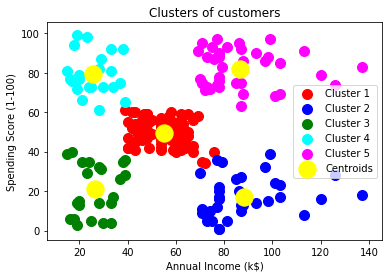

In [15]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### We reached the final stage and categorised all the customers into different clusters. This data can be shared with the Shopping mall so that this can be used for business purpose.

#### All the customers and their predicted clusters are being written into the final submission file.

In [16]:
df1 = pd.DataFrame(y_kmeans)
KMsubmission = pd.concat([dataset1,df1],axis = 1)
KMsubmission.to_csv('KMsubmission.csv', index=False)
KMsubmission

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3
